In [1]:
import torch

from StreamDiffusionIO import LatentConsistencyModelStreamIO

%load_ext autoreload
%autoreload 2

/vast/yw7486/miniconda3/envs/kanji/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/vast/yw7486/miniconda3/envs/kanji/lib/python3.10/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/vast/yw7486/miniconda3/envs/kanji/lib/python3.10/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model_id_or_path = "runwayml/stable-diffusion-v1-5"
kanji_lora_path = "../ckpts/kanji-lora-0/pytorch_lora_weights.safetensors"
lcm_lora_path = "../ckpts/kanji-lora-lcm-0/pytorch_lora_weights.safetensors"

stream = LatentConsistencyModelStreamIO(
    model_id_or_path=model_id_or_path,
    lcm_lora_path=lcm_lora_path,
    lora_dict={kanji_lora_path: 1},
    resolution=128,
    device=device,
    use_xformers=True,
)

In [6]:
text = "Today I saw a beautiful sunset and it made me feel so happy."
prompt_list = text.split()
prompt_list

['Today',
 'I',
 'saw',
 'a',
 'beautiful',
 'sunset',
 'and',
 'it',
 'made',
 'me',
 'feel',
 'so',
 'happy.']

  0%|                                                                                                                         | 0/13 [00:00<?, ?it/s]

  8%|████████▋                                                                                                        | 1/13 [00:01<00:17,  1.49s/it]

No image available yet. Returning None.


 15%|█████████████████▍                                                                                               | 2/13 [00:03<00:17,  1.57s/it]

No image available yet. Returning None.


 23%|██████████████████████████                                                                                       | 3/13 [00:04<00:15,  1.55s/it]

No image available yet. Returning None.


 31%|██████████████████████████████████▊                                                                              | 4/13 [00:06<00:14,  1.56s/it]

No image available yet. Returning None.


 38%|███████████████████████████████████████████▍                                                                     | 5/13 [00:07<00:12,  1.56s/it]

No image available yet. Returning None.


 46%|████████████████████████████████████████████████████▏                                                            | 6/13 [00:09<00:11,  1.57s/it]

No image available yet. Returning None.


 54%|████████████████████████████████████████████████████████████▊                                                    | 7/13 [00:10<00:09,  1.53s/it]

No image available yet. Returning None.


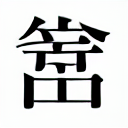

 62%|█████████████████████████████████████████████████████████████████████▌                                           | 8/13 [00:12<00:07,  1.51s/it]

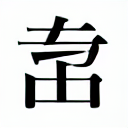

 69%|██████████████████████████████████████████████████████████████████████████████▏                                  | 9/13 [00:13<00:06,  1.52s/it]

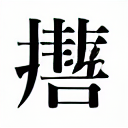

 77%|██████████████████████████████████████████████████████████████████████████████████████▏                         | 10/13 [00:15<00:04,  1.52s/it]

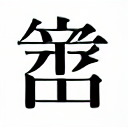

 85%|██████████████████████████████████████████████████████████████████████████████████████████████▊                 | 11/13 [00:17<00:03,  1.57s/it]

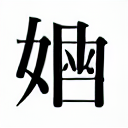

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 12/13 [00:18<00:01,  1.55s/it]

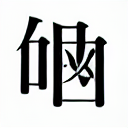

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:20<00:00,  1.55s/it]


In [31]:
from tqdm import tqdm

for prompt in tqdm(prompt_list):
    image = stream(prompt)
    if image is not None:
        display(image)